## COMP 6934 Winter 2025 In class Work 4X

Using some aggregation methods with Pandas.

The dataset is the same as problem set 2 through 6, taken from <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023>

But I've improved the data set by removing the strange degree symbols in the column names. Get the improved data set weather.zip

If the numpy library is not aleady installed, you may need to install it.

### Credit Problem Classroom Rules

You must complete the activity in class in the time allotted. The following rules apply to the activity

* You may not use any interaction with a person or generative AI, but you must still include an attributions table indicating any use of other static or outside online resources that are were not created by you during the invigilated activity class session.

* University rules regarding academic dishonesty and penalties apply to the activity.

* You will need a computer to manipulate the exam code and to push your solution to the remote.

* Bring your student ID; they will be checked

* Cell phones may NOT be used during the credit problem session

* Do NOT contact other people during the exam, this includes pushing to any repository except the exam repo. You may consult the web, but you may not post queries or interact with others via a web site or with any other technology.

* Make sure you are on the attendance sheet.


## Problem Set 7X

For each of the following three problems, use a different plot type from the { line, scatter, bar } choices. 

Don't forget to deal with bad data values, but only from the columns we are plotting. Don't drop records with bad data if the columns we are using are good data.

### Problem 7.1

* Choose one weather station and plot the highest and lowest temperature for each month over a period of two years.
    * You can choose the years and the weather station 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_NL = pd.read_csv('Data/NL_weather.csv',low_memory=False)

In [16]:
# St. Jhon's Station.
df_st = df_NL[df_NL['Station Name'].str.contains("ST. JOHN'S INTL") & (df_NL['Year'] >= 2020)
                    & (df_NL['Year'] <=2021 )].reset_index()

In [4]:
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      731 non-null    int64  
 1   Longitude (x)              731 non-null    float64
 2   Latitude (y)               731 non-null    float64
 3   Station Name               731 non-null    object 
 4   Climate ID                 731 non-null    object 
 5   Date/Time                  731 non-null    object 
 6   Year                       731 non-null    int64  
 7   Month                      731 non-null    int64  
 8   Day                        731 non-null    int64  
 9   Data Quality               0 non-null      float64
 10  Max Temp (C)               719 non-null    float64
 11  Max Temp Flag              12 non-null     object 
 12  Min Temp (C)               719 non-null    float64
 13  Min Temp Flag              12 non-null     object 

In [6]:
# Handle missing values for temperature
df_st = df_st.dropna(subset=['Max Temp (C)', 'Min Temp (C)'])

In [17]:
mon_data = df_st.groupby(['Month'])[['Max Temp (C)', 'Min Temp (C)']].agg(['max', 'min']).reset_index()

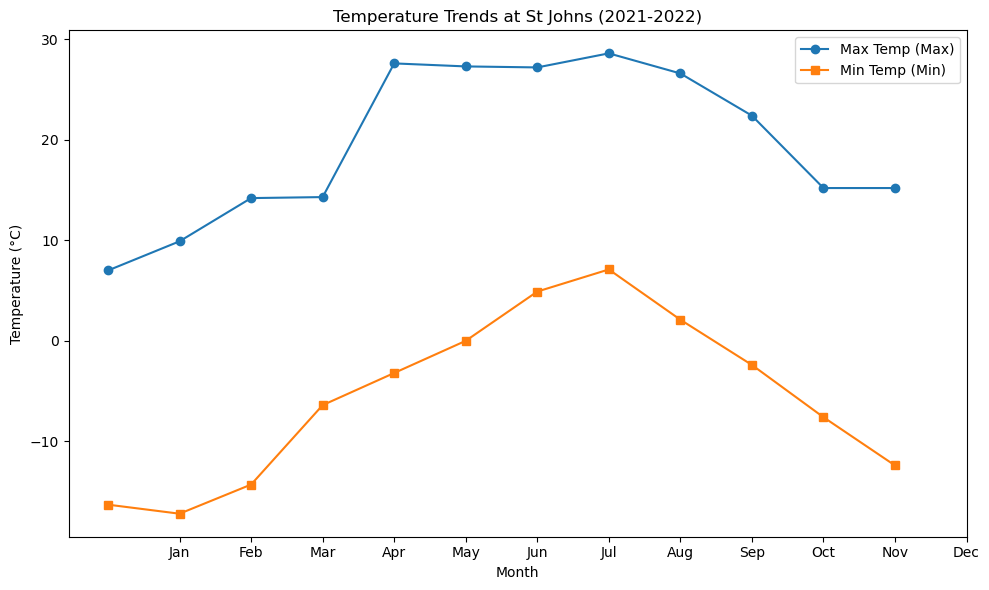

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mon_data[('Max Temp (C)', 'max')], marker='o', label='Max Temp (Max)')
ax.plot(mon_data[('Min Temp (C)', 'min')], marker='s', label='Min Temp (Min)')

ax.set_title('Temperature Trends at St Johns (2021-2022)')
ax.set_xlabel('Month') 
ax.set_ylabel('Temperature (°C)')
ax.set_xticks(range(1, 13))
ax.set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
ax.legend()
plt.tight_layout()
# Show plot
plt.show()

### Problem 7.2

* In the NL data , excluding the Corner Brook station, there are nine weather stations with the (second highest) number of records reported (2191 records each)
   * plot the total yearly precipitation for these nine stations for the year 2020.

In [10]:
df_NL['Station Name'].unique()

array(['ARGENTIA (AUT)', 'BADGER (AUT)', "BAY D'ESPOIR GEN STN",
       'BONAVISTA', 'BURGEO NL', 'BURNT POND', 'BUTLERVILLE',
       'CAPE RACE (AUT)', 'CHARLESTON', 'CORMACK RCS', 'CORNER BROOK',
       'COW HEAD', 'DANIELS HARBOUR', "DANIEL'S HARBOUR", 'DEER LAKE',
       'DEER LAKE A', 'ENGLEE (AUT)', 'FEROLLE POINT (AUT)',
       'GANDER INTL A', 'GANDER AIRPORT CS', 'HARBOUR BRETON',
       'INDIAN BAY B.B.', 'LA SCIE', 'LETHBRIDGE', 'MIDDLE ARM',
       'MILLERTOWN RCS', 'PLUM POINT', 'PORT AUX BASQUES',
       'ROCKY HARBOUR CS', 'SAGONA ISLAND', 'ST. ANTHONY A', 'ST ANTHONY',
       "ST. JOHN'S INTL A", 'ST JOHNS WEST CLIMATE', 'ST LAWRENCE',
       'SOPS ARM WHITE BAY', 'STEPHENVILLE A', 'STEPHENVILLE RCS',
       'SWIFT CURRENT', 'TERRA NOVA NAT PARK CS', 'TWILLINGATE (AUT)',
       'WINTERLAND', 'WINTERLAND BRANCH HILL', 'WRECKHOUSE',
       'GRATES COVE', 'POOLS ISLAND', 'MAIN BROOK', 'MARTICOT ISLAND',
       "MCIVER'S", 'CAPE KAKKIVIAK', 'CARTWRIGHT A', 'CHURCHILL FALLS'

In [11]:
# St. Jhon's Station.
df_cb = df_NL[df_NL['Station Name']=='NL'&df_NL['Station Name'] != 'Corner Brook' & (df_NL['Year'] >= 2020)].reset_index()


TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

### Problem 7.3

* In the NL data , there are 63 weather stations. Plot the relationship between latitute and lowest recorded temperature for each station. 

In [13]:
st_data = df_NL.groupby('Station Name').agg({'Latitude (y)': 'first','Min Temp (C)': 'min'}).reset_index()

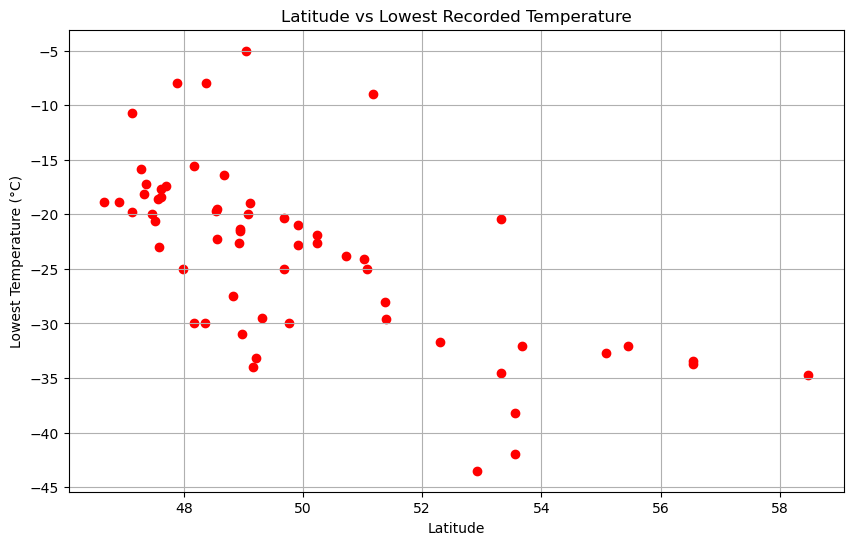

In [18]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(st_data['Latitude (y)'], st_data['Min Temp (C)'], color='Red', )
plt.title('Latitude vs Lowest Recorded Temperature')
plt.xlabel('Latitude')
plt.ylabel('Lowest Temperature (°C)')
plt.grid()
plt.show()


# Attributions

Be sure to add your own sources or indicate you have none to add.  Sources can be web sites, text materials, and so on. They do not have to be hyperlinks. Other people are also sources, but they are not allowed for in class credit problems.

| Source | What is it | How used |
|--|--|--|
| <https://www.kaggle.com/datasets/jash312/canada-daily-weather-data-from-2018-to-2023> | data sets | taken directly as csv files  |

# Submission

Submission mechanism I want for the course is not yet available. So for now, upload your soution *inclass4X.ipynb* file to the [Brightspace Assignment folder](https://online.mun.ca/d2l/lms/dropbox/user/folders_list.d2l?ou=603130&isprv=0).

Submission will close at 4 PM. Make sure to submit whatever you have completed at that time.
